# Introducción

En este ejercicio generaremos un árbol de decisión que a través de Regresión, nos permita predecir si una persona sufrirá diabetes o no

## DataSet: Pacientes Enfermos con Diabetes

Se obtuvieron diez variables basales, edad, sexo, índice de masa corporal, presión arterial promedio y seis mediciones del suero sanguíneo para cada uno de n = 442 pacientes con diabetes, así como la respuesta de interés, una medida cuantitativa de la progresión de la enfermedad un año después del inicio .

* age: age in years
* sex
* bmi: body mass index
* bp: average blood pressure
* s1: T-Cells (a type of white blood cells)
* s2: low-density lipoproteins
* s3: high-density lipoproteins
* s4: thyroid stimulating hormone
* s5: lamotrigine
* s6: blood sugar level

Objetivo: medida cuantitativa de la progresión de la enfermedad.


## Antes de modelar

### Cargamos y preparamos el dataset

In [2]:
import pandas as pd
from sklearn.datasets import load_diabetes
datos = load_diabetes()

X = pd.DataFrame(datos.data, columns=datos.feature_names)
Y = datos.target

In [2]:
X.isna().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [3]:
X.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

## Modelamiento (primeros pasos)

Usando la librería SKLEARN, generaremos un árbol de decisión para regresión

**INDICA QUE SIGNIFICAN CADA UNA DE LAS VARIABLES SIGUIENTES Y QUE INDICAN LAS MEDIDAS DE VERIFICACION USADAS.**

In [4]:
from sklearn.tree import DecisionTreeRegressor

mo2 = DecisionTreeRegressor()
mo2.fit(X, Y)

Yhat = mo2.predict(X)

**DESCRIPCIÓN DE VARIABLES**


---
+ mo2 -> Modelo predictivo, basado en árbol de decisión
+ X -> Variables independientes usadas en el modelo predictivo
+ Y -> Variable objetivo, variable predecida


In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(Y, Yhat)
mae = mean_absolute_error(Y, Yhat)
R2 = r2_score(Y, Yhat)

print("MSE: ",mse)
print("MAE: ",mae)
print("R^2: ",R2)

MSE:  0.0
MAE:  0.0
R^2:  1.0


**DESCRIPCIÓN DE LAS MEDIDAS**


---
+ MSE -> Valor medio de los cuadrados de la diferencia entre los valores predichos y los valores reales.
+ MAE -> Promedio de la suma de los valores absolutos de la diferencia entre los valores predichos y los valores reales.
+ R^2 -> Coeficiente de determinación, determina la capacidad de un modelo para predecir futuros resultados. El mejor resultado posible es 1.0, y ocurre cuando la predicción coincide con los valores de la variable objetivo. R2 puede tomar valores negativos pues la predicción puede ser arbitrariamente mala. Cuando la predicción coincide con la esperanza de los valores de la variable objetivo, el resultado de R2 es 0.


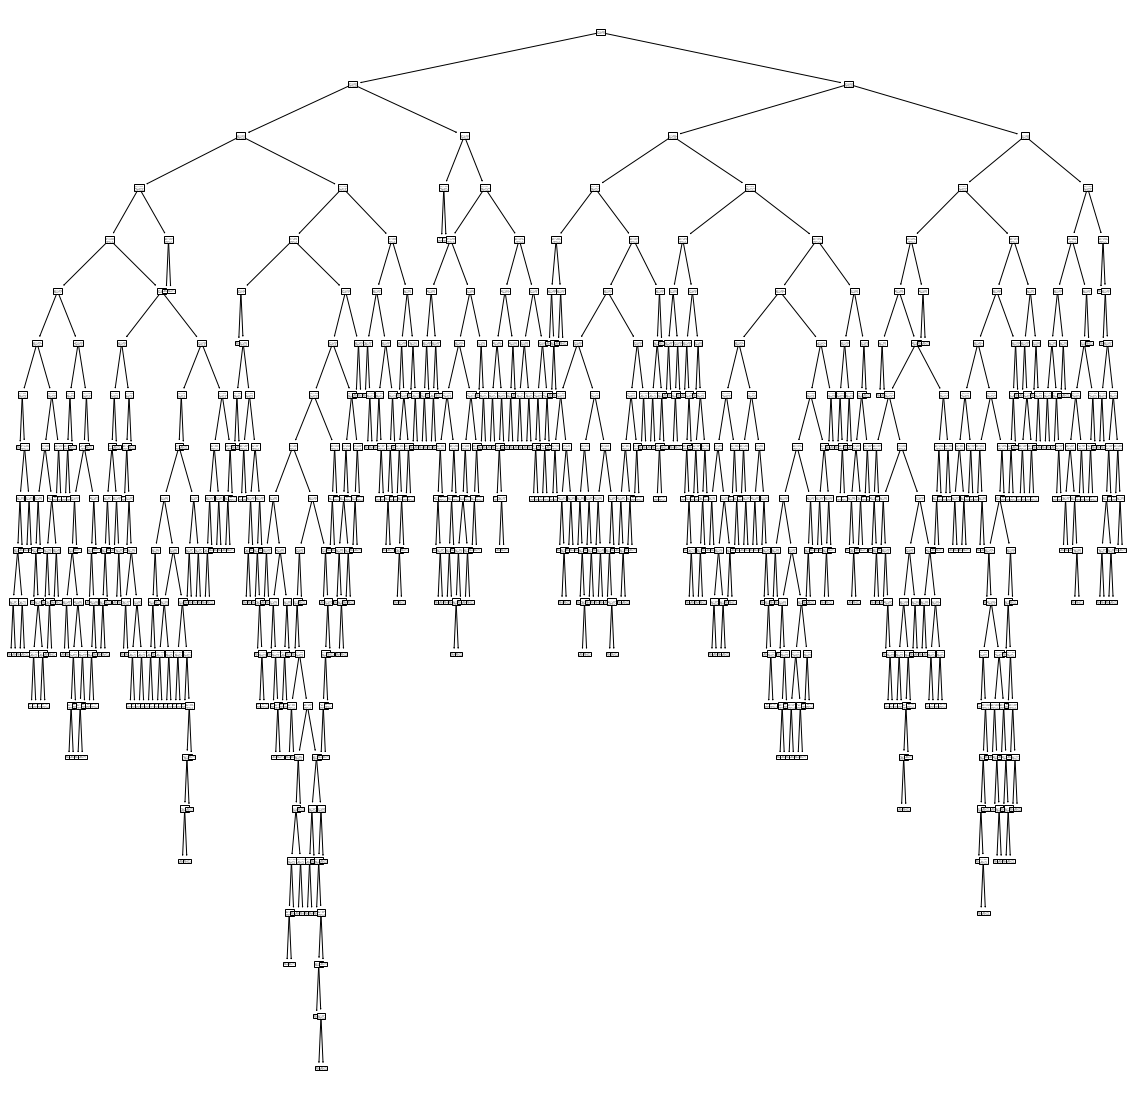

In [6]:
# Visualizamos el árbol generado!

import matplotlib.pyplot as plt
from sklearn import tree
plt.subplots(1,1,figsize=(20,20))
_= tree.plot_tree(mo2) 

## Evitando el Overfitting

**INDICA : ¿por qué existe OVERFITTING?**



---
**RESPUESTA**


---

El modelo se testea con los mismos datos con los cuales fue entrenado (los mismos con los cuales aprendio), por ende, no hay error o diferencia entre el valor predecido y el valor real; esa es la razón por la cual MAE y MSE es igual a cero.

In [14]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2, random_state = 29)

In [15]:
from sklearn.tree import DecisionTreeRegressor

mo2 = DecisionTreeRegressor()
mo2.fit(Xtrain, Ytrain)

Yhat = mo2.predict(Xtest)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(Ytest, Yhat)
mae = mean_absolute_error(Ytest, Yhat)
R2 = r2_score(Ytest, Yhat)

print("MSE: ",mse)
print("MAE: ",mae)
print("R^2: ",R2)

MSE:  6065.943820224719
MAE:  60.91011235955056
R^2:  0.10441270072752162


In [16]:
1 - sum((Ytest - Yhat)**2)/sum((Ytest - Ytest.mean())**2)
#sum((Yhat - Ytest.mean())**2)/sum((Ytest - Ytest.mean())**2)

0.1044127007275214

In [17]:
mo2.feature_importances_

array([0.08944981, 0.00958695, 0.30580255, 0.10738123, 0.05548816,
       0.07052   , 0.05990074, 0.02782401, 0.18442119, 0.08962537])

In [18]:
Xtrain.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

## Sintonización del modelo

**INDICA :** 

¿cómo se realiza esta sintonización?

¿qué hiperparámetros se están modificando?

¿qué ocurre si ingresas otros valores?....prueba



---
**RESPUESTAS**


---
+ La sintonización se realiza por medio de la asignación de valores a lo que se conoce con el nombre de hiperparámetro; en este caso, se prueba cambiando las profundidades del árbol (desde 3 a 5) y ll número mínimo de muestras necesarias para dividir un nodo interno. Estos hiperparámetros se llaman max_depth y min_samples_split respectivamente.
+ max_depth y min_samples_split
+ Se tendrán tiempos distintos en las fases de entrenamiento.





In [19]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2)

In [20]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()
params = {"max_depth": np.arange(3,6),          # [3,4,5]
          "min_samples_split": np.arange(2,5)}  # [2,3,4]
grid = GridSearchCV(estimator=model, param_grid=params,cv=10)
grid.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([3, 4, 5]),
                         'min_samples_split': array([2, 3, 4])},
             pre_dispatch='2*n_jo

In [21]:
print(grid.best_score_)
print(grid.best_params_)

0.34271598750052473
{'max_depth': 3, 'min_samples_split': 2}


In [22]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002345,0.000814,0.001268,0.000372,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.388880,0.336789,0.528049,0.305872,-0.019656,0.490599,0.465698,0.364446,0.262885,0.303598,0.342716,0.146477,1
1,0.001777,0.000074,0.001050,0.000075,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.388880,0.336789,0.528049,0.305872,-0.019656,0.490599,0.465698,0.364446,0.262885,0.303598,0.342716,0.146477,1
2,0.001682,0.000066,0.001005,0.000119,3,4,"{'max_depth': 3, 'min_samples_split': 4}",0.388880,0.336789,0.528049,0.305872,-0.019656,0.490599,0.465698,0.364446,0.262885,0.303598,0.342716,0.146477,1
3,0.001865,0.000038,0.000946,0.000008,4,2,"{'max_depth': 4, 'min_samples_split': 2}",0.356206,0.341895,0.549531,0.037370,0.131325,0.438704,0.427732,0.197912,0.231612,0.171466,0.288375,0.151799,4
4,0.001901,0.000054,0.000983,0.000041,4,3,"{'max_depth': 4, 'min_samples_split': 3}",0.356206,0.341895,0.549531,0.037370,0.131325,0.438704,0.427732,0.197912,0.231612,0.150475,0.286276,0.153536,6
5,0.001897,0.000072,0.000966,0.000019,4,4,"{'max_depth': 4, 'min_samples_split': 4}",0.356206,0.341895,0.565471,0.037370,0.131325,0.438704,0.428927,0.197912,0.231612,0.150475,0.287990,0.156426,5
6,0.002050,0.000034,0.000978,0.000044,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.241576,0.213684,0.537020,-0.073162,-0.008176,0.323000,0.393394,0.156336,0.117749,0.086065,0.198749,0.175391,8
7,0.002159,0.000103,0.001035,0.000074,5,3,"{'max_depth': 5, 'min_samples_split': 3}",0.256619,0.213684,0.523495,-0.073162,-0.008176,0.349025,0.393394,0.156336,0.117749,0.062964,0.199193,0.176932,7
8,0.002116,0.000122,0.001169,0.000505,5,4,"{'max_depth': 5, 'min_samples_split': 4}",0.257072,0.213684,0.528438,-0.073162,-0.043884,0.349025,0.394589,0.157408,0.117749,0.062964,0.196388,0.182404,9


**Usar otra función de scoring/loss para elegir el "mejor" modelo**

**INVESTIGA** COMO SE USAN ESTAS FUNCIONES



*   Funciones pre-definidas: 
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

*   Funciones personalizadas: 
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring

In [23]:
grid = GridSearchCV(estimator=model, param_grid=params,cv=10, scoring='r2')
grid.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([3, 4, 5]),
                         'min_samples_split': array([2, 3, 4])},
             pre_dispatch='2*n_jo



---


Acerca de GridSearchCV


---


Es una clase disponible en scikit-learn que permite evaluar y seleccionar de forma sistemática los parámetros de un modelo. Indicándole un modelo y los parámetros a probar, puede evaluar el rendimiento del primero en función de los segundos mediante validación cruzada. En caso de que se desee evaluar modelos con parámetros aleatorios existe el método RandomizedSearchCV.



In [26]:
print(grid.best_score_)
print(grid.best_params_)

0.34271598750052473
{'max_depth': 3, 'min_samples_split': 2}
make_scorer(r2_score)


In [27]:
#pd.DataFrame(grid.cv_results_).head()
pd.DataFrame(grid.cv_results_).iloc[grid.best_index_]

mean_fit_time                                            0.00228953
std_fit_time                                             0.00169044
mean_score_time                                         0.000974107
std_score_time                                          0.000347603
param_max_depth                                                   3
param_min_samples_split                                           2
params                     {'max_depth': 3, 'min_samples_split': 2}
split0_test_score                                           0.38888
split1_test_score                                          0.336789
split2_test_score                                          0.528049
split3_test_score                                          0.305872
split4_test_score                                        -0.0196558
split5_test_score                                          0.490599
split6_test_score                                          0.465698
split7_test_score                               

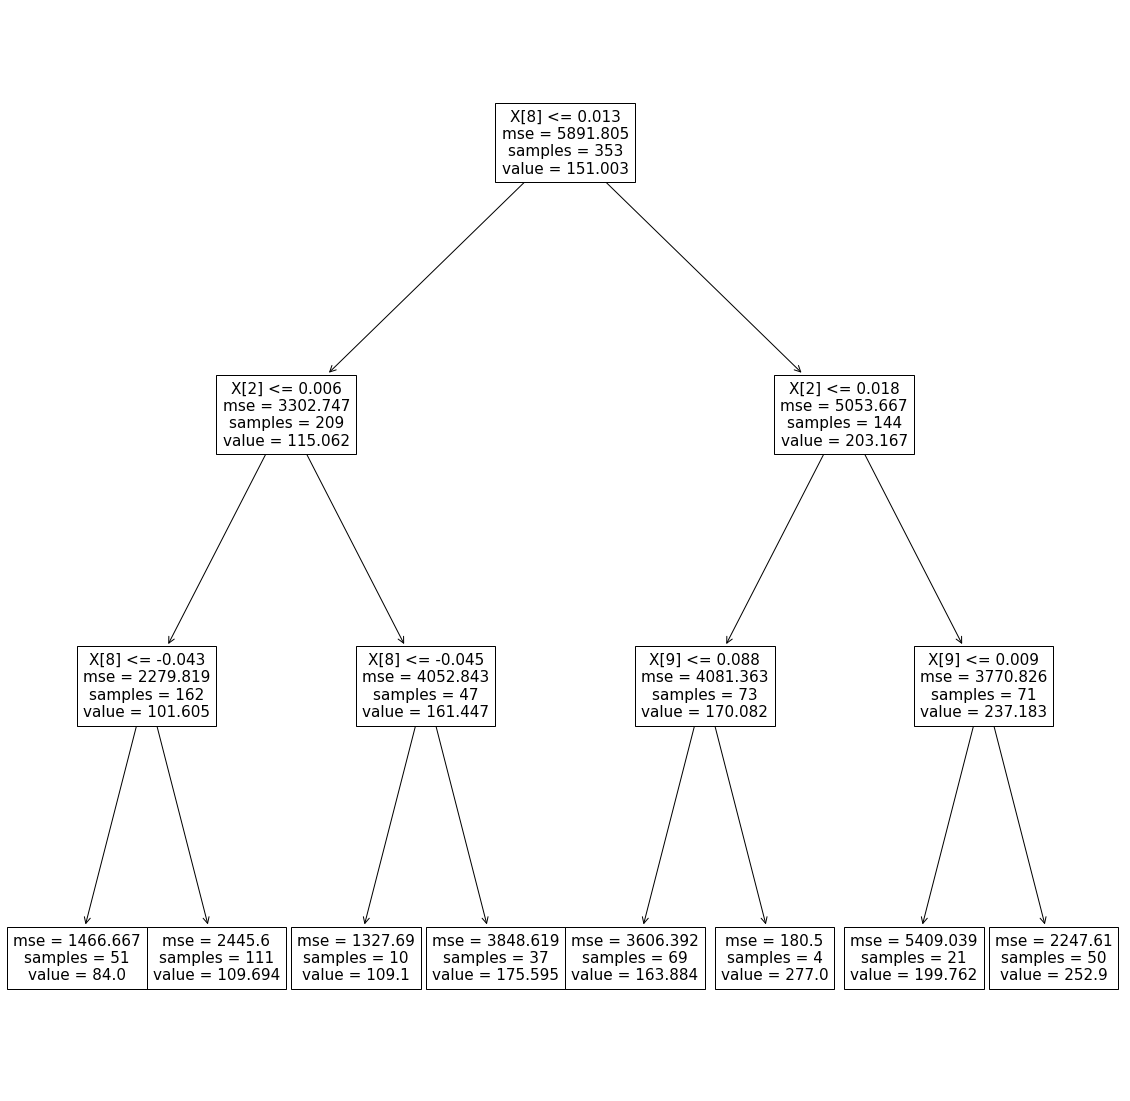

In [28]:
# Visualizamos el árbol ganador!

import matplotlib.pyplot as plt
from sklearn import tree
plt.subplots(1,1,figsize=(20,20))
_= tree.plot_tree(grid.best_estimator_) 

Para entender un poco el árbol

In [100]:
import math
import collections
print("Observaciones : {0} y son {1:n} para train y {2} test".format(X.shape[0], 
                                                               math.floor(X.shape[0]*0.8),
                                                               math.floor(X.shape[0]*0.2)))
# Esto me ayuda a entender porque aparecen en el árbol X[8], X[2] y X[9]
print(grid.best_estimator_.feature_importances_)

print(X.columns[8],X.columns[2],X.columns[9])
# Para entender el 51 del nodo terminal de más a la izquierda
print(Xtrain.query("s5 <= -0.043 & bmi <= 0.006").shape[0])
# Para entender 'samples' del primer nodo del segundo nivel del árbol
print(Xtrain.query("s5 <= 0.013").shape[0])

print(Xtrain.query("s5 <= -0.043 & bmi <= 0.006").index)

print(Xtest[['s5','bmi','s6']])
print(Xtest[['s5','bmi','s6']].iloc[3:4])
print(grid.predict(Xtest.iloc[3:4]))

Observaciones : 442 y son 353 para train y 88 test
[0.         0.         0.26536344 0.         0.         0.
 0.         0.         0.65286954 0.08176702]
s5 bmi s6
51
209
Int64Index([259, 170, 361,  79, 406,  77, 297, 166,  86,   1, 165, 370, 334,
            391, 243, 136, 296,  55, 349,  22, 126, 433, 419,  57,  10, 308,
            434, 220, 335, 171, 292,  41, 133, 288, 131,  69,  21, 237, 242,
            427, 379,  90, 351, 110, 201,   6,  60, 187,  82, 439, 358],
           dtype='int64')
           s5       bmi        s6
196 -0.033249 -0.046085  0.011349
219  0.001144 -0.041774 -0.030072
81  -0.006080 -0.022373 -0.001078
365  0.031193 -0.038540  0.098333
151 -0.008944 -0.004050 -0.013504
..        ...       ...       ...
124 -0.015998  0.023973 -0.013504
226 -0.039810 -0.046085 -0.054925
3    0.022692 -0.011595 -0.009362
186  0.047186  0.042296 -0.038357
150 -0.019197  0.070319 -0.009362

[89 rows x 3 columns]
           s5      bmi        s6
365  0.031193 -0.03854  0.098333


### Graficamos los resultados estimados

4393.017701319016
53.69418806062675
0.2745698347997503


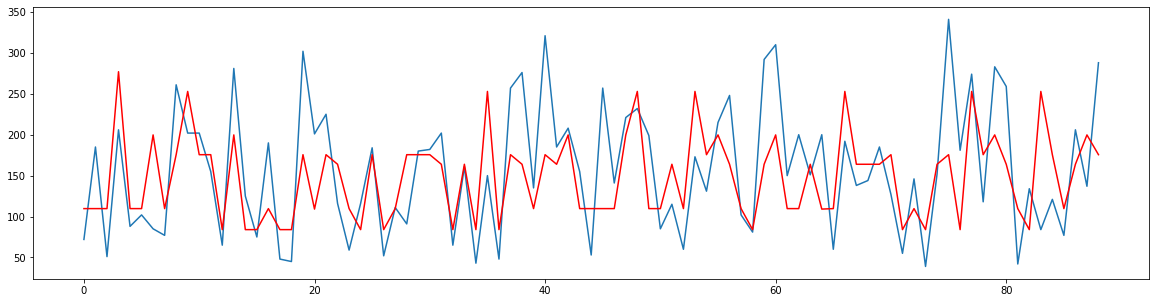

In [43]:
Yhat = grid.predict(Xtest)

print(mean_squared_error(Ytest, Yhat))
print(mean_absolute_error(Ytest, Yhat))
print(r2_score(Ytest, Yhat))

import matplotlib.pyplot as plt
plt.subplots(figsize=(20,5))
plt.plot(Ytest)
plt.plot(Yhat, 'r')

In [44]:
np.unique(Yhat)

array([ 84.        , 109.1       , 109.69369369, 163.88405797,
       175.59459459, 199.76190476, 252.9       , 277.        ])

In [45]:
Yhat

array([109.69369369, 109.69369369, 109.69369369, 277.        ,
       109.69369369, 109.69369369, 199.76190476, 109.69369369,
       175.59459459, 252.9       , 175.59459459, 175.59459459,
        84.        , 199.76190476,  84.        ,  84.        ,
       109.69369369,  84.        ,  84.        , 175.59459459,
       109.1       , 175.59459459, 163.88405797, 109.69369369,
        84.        , 175.59459459,  84.        , 109.69369369,
       175.59459459, 175.59459459, 175.59459459, 163.88405797,
        84.        , 163.88405797,  84.        , 252.9       ,
        84.        , 175.59459459, 163.88405797, 109.69369369,
       175.59459459, 163.88405797, 199.76190476, 109.69369369,
       109.69369369, 109.69369369, 109.69369369, 199.76190476,
       252.9       , 109.69369369, 109.69369369, 163.88405797,
       109.69369369, 252.9       , 175.59459459, 199.76190476,
       163.88405797, 109.69369369,  84.        , 163.88405797,
       199.76190476, 109.69369369, 109.69369369, 163.88

In [46]:
Ytest

array([ 72., 185.,  51., 206.,  88., 102.,  85.,  77., 261., 202., 202.,
       155.,  65., 281., 125.,  75., 190.,  48.,  45., 302., 201., 225.,
       116.,  59., 116., 184.,  52., 111.,  91., 180., 182., 202.,  65.,
       161.,  43., 150.,  48., 257., 276., 135., 321., 185., 208., 155.,
        53., 257., 141., 221., 232., 199.,  85., 115.,  60., 173., 131.,
       215., 248., 102.,  81., 292., 310., 150., 200., 151., 200.,  60.,
       192., 138., 144., 185., 127.,  55., 146.,  39., 152., 341., 181.,
       274., 118., 283., 259.,  42., 134.,  84., 121.,  77., 206., 137.,
       288.])

# CONCLUSIONES

Reflexiona sobre lo realizado y explica:

¿qué indica el árbol ganador? ¿por qué es un "ganador"?

¿que efectos tienen el manejar los hiperparámetros?

Comparte tus conclusiones con la clase.

**REFLEXIONES**


---
**¿qué indica el árbol ganador? ¿por qué es un "ganador"?**

Las condiciones que se deben cumplir para que el valor de la variable predicha sea el indicado en el atributo 'value' de cada nodo

**¿que efectos tienen el manejar los hiperparámetros?**

Se generan diversos modelos con distintas configuraciones para tener opciones para evaluar y quedarse con la mejor de ellas.
